In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Datas/Credit_Card.csv")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
# Data Preparation & Model Building

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop('default.payment.next.month', axis = 1)
y = data['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [9]:
# Default Parameters

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier()

In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
predictions = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.83      0.94      0.89      7058
          1       0.61      0.32      0.42      1942

avg / total       0.79      0.81      0.79      9000



In [16]:
print(confusion_matrix(y_test, predictions))

[[6667  391]
 [1323  619]]


In [17]:
print(accuracy_score(y_test, predictions))

0.8095555555555556


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(2, 20, 5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, scoring = 'accuracy', cv = n_folds)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [19]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.091362,0.005343,0.005132,0.000837,2,{'max_depth': 2},0.796715,0.805476,0.802619,0.792619,...,0.799190,0.004495,4,0.796893,0.801429,0.804405,0.799821,0.799119,0.800333,0.002504
1,0.194834,0.017473,0.005863,0.000682,7,{'max_depth': 7},0.812426,0.815952,0.815714,0.812857,...,0.813524,0.002025,1,0.831657,0.828750,0.830357,0.830476,0.828939,0.830036,0.001075
2,0.282741,0.023985,0.007385,0.000755,12,{'max_depth': 12},0.809807,0.811190,0.813810,0.812143,...,0.811333,0.001533,2,0.878386,0.879702,0.878929,0.877738,0.880067,0.878964,0.000848
3,0.344377,0.013861,0.010171,0.002098,17,{'max_depth': 17},0.806713,0.809524,0.811429,0.806667,...,0.807857,0.002310,3,0.926127,0.928095,0.929048,0.930060,0.926254,0.927917,0.001541


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


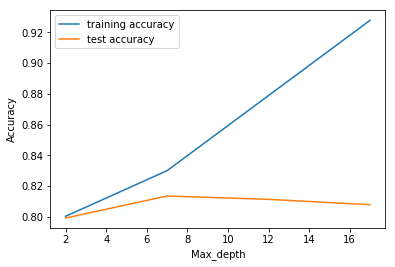

In [20]:
plt.figure()
plt.plot(scores["param_max_depth"],
        scores["mean_train_score"],
        label = "training accuracy")
plt.plot(scores["param_max_depth"],
        scores["mean_test_score"],
        label = "test accuracy")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'n_estimators' : range(100, 1500, 400)}

rf = RandomForestClassifier(max_depth= 4)

rf = GridSearchCV(rf, parameters, scoring = "accuracy", cv = n_folds)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.152390,0.020593,0.030939,0.001921,100,{'n_estimators': 100},0.812902,0.815238,0.811429,0.805000,...,0.810571,0.003583,1,0.810703,0.811131,0.811310,0.812321,0.812333,0.811560,0.000657
1,5.786024,0.216803,0.154195,0.009614,500,{'n_estimators': 500},0.811235,0.813333,0.811429,0.804762,...,0.809905,0.002953,2,0.810882,0.810060,0.811548,0.812321,0.813166,0.811595,0.001083
2,10.744209,0.640493,0.286348,0.016620,900,{'n_estimators': 900},0.810997,0.813571,0.810952,0.805952,...,0.809810,0.002711,3,0.811001,0.810536,0.811429,0.812619,0.811797,0.811476,0.000710
3,15.611312,0.520882,0.428018,0.020653,1300,{'n_estimators': 1300},0.811473,0.813571,0.810952,0.805714,...,0.809714,0.002955,4,0.811120,0.810298,0.811548,0.812857,0.812571,0.811679,0.000940


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


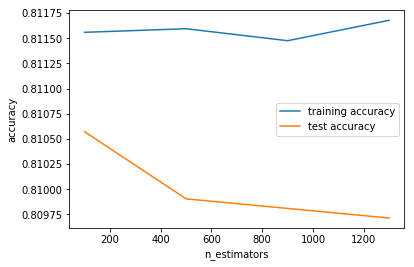

In [23]:
plt.figure()
plt.plot(scores["param_n_estimators"],
        scores["mean_train_score"],
        label = "training accuracy")
plt.plot(scores["param_n_estimators"],
        scores["mean_test_score"],
        label = "test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [24]:
# Tuning max features

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_features' : [4, 8, 14, 20, 24]}

rf = RandomForestClassifier(max_depth = 4)

rf = GridSearchCV(rf, parameters, cv = n_folds, scoring = "accuracy")

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.121046,0.004549,0.003903,0.000468,4,{'max_features': 4},0.811711,0.809524,0.808095,0.803095,...,0.807810,0.002894,5,0.810524,0.806964,0.809583,0.810357,0.811737,0.809833,0.001592
1,0.231000,0.026705,0.004793,0.000614,8,{'max_features': 8},0.815758,0.820952,0.821190,0.816429,...,0.816619,0.004520,4,0.818680,0.819464,0.820893,0.821488,0.814951,0.819095,0.002299
2,0.400668,0.023909,0.005729,0.001040,14,{'max_features': 14},0.818139,0.820000,0.819048,0.816429,...,0.818524,0.001202,2,0.821180,0.820417,0.821548,0.822917,0.822094,0.821631,0.000843
3,0.570486,0.024746,0.004588,0.000446,20,{'max_features': 20},0.818139,0.820476,0.818571,0.818333,...,0.818524,0.001098,2,0.822192,0.821190,0.820595,0.822202,0.822570,0.821750,0.000737
4,0.652635,0.011722,0.005325,0.001936,24,{'max_features': 24},0.818139,0.823333,0.821905,0.815714,...,0.819286,0.002867,1,0.823144,0.821726,0.821607,0.823214,0.822511,0.822440,0.000679


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


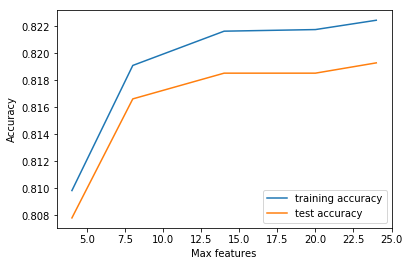

In [27]:
plt.figure()
plt.plot(scores["param_max_features"],
        scores["mean_train_score"],
        label = 'training accuracy')
plt.plot(scores["param_max_features"],
        scores["mean_test_score"],
        label = "test accuracy")
plt.xlabel('Max features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Tuning min_samples_leaf

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_leaf' : [4, 8, 14, 20, 24]}

rf = RandomForestClassifier(max_depth = 4)

rf = GridSearchCV(rf, parameters, cv = n_folds, scoring = "accuracy")

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.139192,0.009397,0.005052,0.001329,4,{'min_samples_leaf': 4},0.807903,0.818095,0.818810,0.804286,...,0.811857,0.005709,1,0.806655,0.813095,0.819464,0.811250,0.816439,0.813381,0.004387
1,0.150093,0.018102,0.005222,0.000760,8,{'min_samples_leaf': 8},0.809807,0.811667,0.815714,0.808810,...,0.810571,0.003004,2,0.809572,0.809821,0.815595,0.813929,0.812452,0.812274,0.002329
2,0.144066,0.006587,0.005289,0.000800,14,{'min_samples_leaf': 14},0.805522,0.813810,0.807857,0.806190,...,0.808571,0.002958,3,0.806000,0.810714,0.809464,0.813155,0.812392,0.810345,0.002525
3,0.157294,0.013913,0.007066,0.000877,20,{'min_samples_leaf': 20},0.812902,0.806190,0.815000,0.795952,...,0.806619,0.006876,5,0.814751,0.806488,0.813036,0.805655,0.808166,0.809619,0.003623
4,0.148813,0.011169,0.006119,0.001104,24,{'min_samples_leaf': 24},0.812664,0.812381,0.806905,0.801667,...,0.808000,0.004120,4,0.814989,0.809226,0.809940,0.810952,0.809773,0.810976,0.002083


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


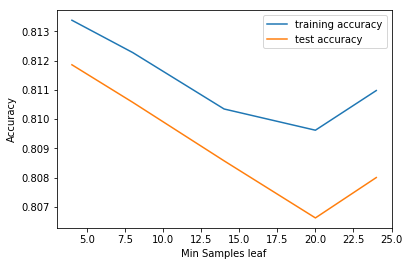

In [31]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
        scores["mean_train_score"],
        label = 'training accuracy')
plt.plot(scores["param_min_samples_leaf"],
        scores["mean_test_score"],
        label = "test accuracy")
plt.xlabel('Min Samples leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# Tuning min_samples_split

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_split' : [200, 500, 50]}

rf = RandomForestClassifier(max_depth = 4)

rf = GridSearchCV(rf, parameters, cv = n_folds, scoring = "accuracy")

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [200, 500, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.146841,0.004533,0.006070,0.001143,200,{'min_samples_split': 200},0.812664,0.811667,0.807857,0.810952,...,0.809143,0.003657,2,0.808977,0.807798,0.809583,0.817262,0.809238,0.810571,0.003399
1,0.136630,0.008796,0.004984,0.000873,500,{'min_samples_split': 500},0.802904,0.801667,0.809762,0.802619,...,0.803286,0.003454,3,0.803679,0.802917,0.808452,0.812262,0.802690,0.806000,0.003770
2,0.146373,0.022347,0.004659,0.000581,50,{'min_samples_split': 50},0.817424,0.807381,0.821667,0.805714,...,0.813429,0.006037,1,0.820049,0.807798,0.819524,0.813512,0.817035,0.815583,0.004527


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


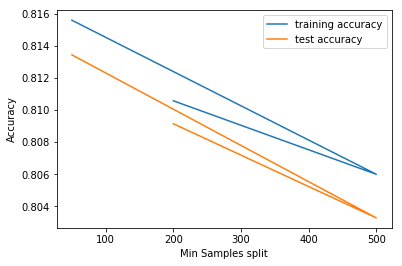

In [35]:
plt.figure()
plt.plot(scores["param_min_samples_split"],
        scores["mean_train_score"],
        label = 'training accuracy')
plt.plot(scores["param_min_samples_split"],
        scores["mean_test_score"],
        label = "test accuracy")
plt.xlabel('Min Samples split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# Grid Search to Find Optimal Hyperparameters

In [39]:
param_grid = {
    'min_samples_split': range(200, 500, 200),
    'min_samples_leaf': range(100, 400, 200),
    'max_depth': [4, 8, 10],
    'n_estimators': [100, 200, 300],
    'max_features': [5, 10]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 1)



In [40]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': range(200, 500, 200), 'min_samples_leaf': range(100, 400, 200), 'max_depth': [4, 8, 10], 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [41]:
# Fitting the final model with the best parameters obtained from grid search.

In [42]:
from sklearn.ensemble import RandomForestClassifier


In [44]:
rfc = RandomForestClassifier(bootstrap = True,
                            max_depth = 10,
                            min_samples_split = 200,
                            min_samples_leaf = 100,
                            n_estimators = 100,
                            max_features = 10)

In [45]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
predictions = rfc.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90      7058
          1       0.69      0.35      0.47      1942

avg / total       0.81      0.83      0.80      9000



In [49]:
print(confusion_matrix(y_test, predictions))

[[6754  304]
 [1255  687]]


In [50]:
(6754 + 687)/ (6754 + 304 + 1255 + 687)

0.8267777777777777